#### Imports

In [ ]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

#### Read Data

In [63]:
file_name= "TrainData/j7thalala2leftsidepothole2wheel.json"
data = pd.read_json(file_name)
data.head(5)

,acceX,acceX_raw,acceY,acceY_raw,acceZ,acceZ_raw,anomaly,count,dataType,gpsSpeed,id,imei,journeyID,lat,lon,obdRpm,obdSpeed,time
0,-1.110223e-17,0.143652,9.861483,9.854534,0.046148,-0.667982,N,0,data_item,1.108585,11fc20d7-f354-40f2-a2ed-91b093b7fc63,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853136541
1,5.551115e-18,0.986411,9.841468,9.993398,-0.055439,-0.578200,N,0,data_item,1.108585,3c89bf4b-44f6-43c6-b15a-264cadaaa908,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853136694
2,5.551115e-18,0.423774,9.751110,9.713276,0.015932,-0.708684,N,0,data_item,1.108585,7c8d167c-c679-4b9f-99bc-db87417b5fac,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853136807
3,1.110223e-17,0.105345,9.763321,9.797073,0.024481,-0.871489,N,0,data_item,1.108585,b54e333e-6568-4e13-902b-27f21142794e,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853136898
4,-1.110223e-17,0.577003,9.808619,9.728839,0.025245,-0.608127,N,0,data_item,1.108585,222e36c7-1a2b-42cd-ab02-764aaac3dce5,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853137010


In [64]:
data.tail(5)

,acceX,acceX_raw,acceY,acceY_raw,acceZ,acceZ_raw,anomaly,count,dataType,gpsSpeed,id,imei,journeyID,lat,lon,obdRpm,obdSpeed,time
104,0.000000e+00,0.723049,9.774286,9.722853,-0.001892,-0.481235,N,0,data_item,2.563700,304699ae-3c6a-4119-ade6-eb84f8128084,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853147019
105,-2.220446e-17,0.826000,9.804357,9.698911,-0.058329,-0.573411,N,0,data_item,2.017951,68b0e2b4-a2a1-4dd7-b05d-126ba4cc0671,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853147119
106,0.000000e+00,0.685939,9.801484,9.871294,0.031510,-0.478840,N,0,data_item,2.017951,d157d9a2-8fbe-43e1-a495-88f42187be16,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853147219
107,1.110223e-17,0.511162,9.855498,10.125079,0.024700,-0.421379,N,0,data_item,2.017951,14ceed09-7e9e-48b5-9c5d-fe553b88b73c,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853147319
108,5.551115e-18,0.375890,9.790950,9.902418,0.051042,-0.333991,N,0,data_item,2.017951,fa3aaf40-fa7e-488b-9c3b-5f80e6d72d8d,353424070112284,3.534241e+27,5.951,80.628,0,0,1530853147419


In [65]:
print(data['anomaly'].unique())

['N' 'P']


In [66]:
data.describe()

,acceX,acceX_raw,acceY,acceY_raw,acceZ,acceZ_raw,count,gpsSpeed,imei,journeyID,lat,lon,obdRpm,obdSpeed,time
count,1.090000e+02,109.000000,109.000000,109.000000,109.000000,109.000000,109.0,109.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,109.0,109.0,1.090000e+02
mean,-1.273192e-20,0.476556,9.800748,9.807067,0.000085,-0.610763,0.0,3.164391,3.534241e+14,3.534241e+27,5.951000e+00,8.062800e+01,0.0,0.0,1.530853e+12
std,1.448552e-17,0.461489,0.066831,0.308732,0.084419,0.609133,0.0,1.537069,1.883661e-01,2.761476e+12,1.070737e-14,7.138247e-14,0.0,0.0,3.167807e+03
min,-4.822531e-17,-0.675165,9.613875,8.887277,-0.240799,-2.522291,0.0,1.108585,3.534241e+14,3.534241e+27,5.951000e+00,8.062800e+01,0.0,0.0,1.530853e+12
25%,-8.326673e-18,0.214281,9.758820,9.643845,-0.039196,-0.846350,0.0,2.087511,3.534241e+14,3.534241e+27,5.951000e+00,8.062800e+01,0.0,0.0,1.530853e+12
50%,0.000000e+00,0.428562,9.804262,9.775525,-0.000066,-0.478840,0.0,2.563700,3.534241e+14,3.534241e+27,5.951000e+00,8.062800e+01,0.0,0.0,1.530853e+12
75%,9.714451e-18,0.775721,9.829209,9.968259,0.032097,-0.333991,0.0,2.908663,3.534241e+14,3.534241e+27,5.951000e+00,8.062800e+01,0.0,0.0,1.530853e+12
max,4.440892e-17,2.203863,10.220135,11.620258,0.284599,1.104924,0.0,6.269142,3.534241e+14,3.534241e+27,5.951000e+00,8.062800e+01,0.0,0.0,1.530853e+12


#### Feature Extraction

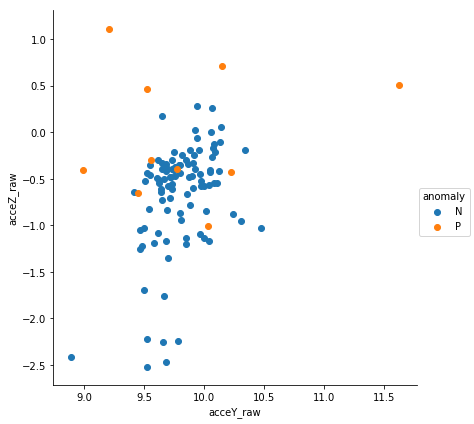

In [67]:
sns.FacetGrid(data, hue="anomaly", size=6) \
   .map(plt.scatter, "acceY_raw", "acceZ_raw") \
   .add_legend()

plt.show()

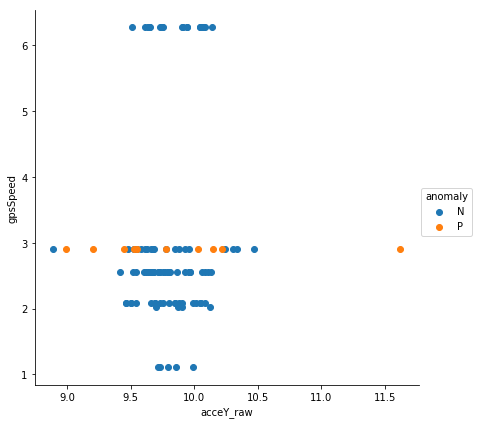

In [68]:
sns.FacetGrid(data, hue="anomaly", size=6) \
   .map(plt.scatter, "acceY_raw", "gpsSpeed") \
   .add_legend()

plt.show()

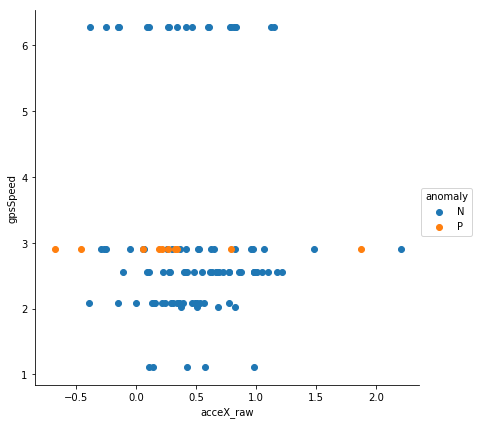

In [69]:
sns.FacetGrid(data, hue="anomaly", size=6) \
   .map(plt.scatter, "acceX_raw", "gpsSpeed") \
   .add_legend()

plt.show()

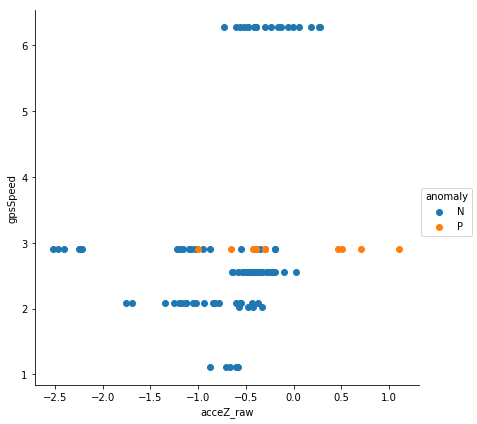

In [70]:
sns.FacetGrid(data, hue="anomaly", size=6) \
   .map(plt.scatter, "acceZ_raw", "gpsSpeed") \
   .add_legend()

plt.show()

In [71]:
acceleration_features = ['acceX','acceX_raw','acceY','acceY_raw','acceZ','acceZ_raw',]
acceleration_data = data[acceleration_features]


Text(0.5,1,'Acceleration Data Correlations')

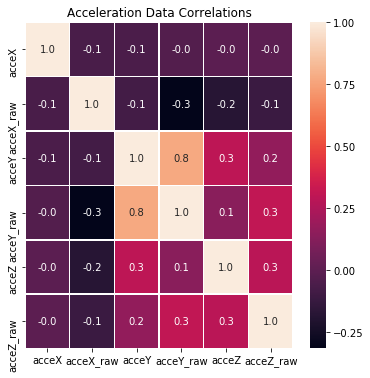

In [72]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(acceleration_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Acceleration Data Correlations')

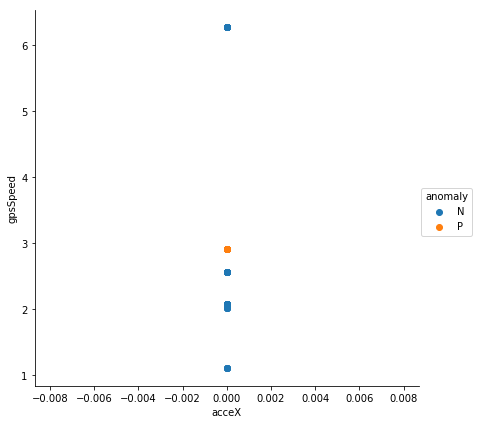

In [73]:
sns.FacetGrid(data, hue="anomaly", size=6) \
   .map(plt.scatter, "acceX", "gpsSpeed") \
   .add_legend()

plt.show()

In [74]:
data.shape

(109, 18)

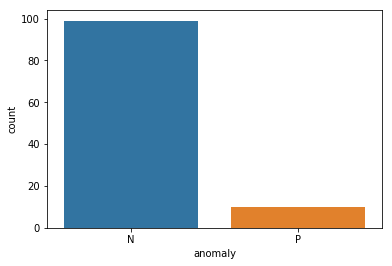

In [75]:
sns.countplot(data['anomaly'],label="Count")
plt.show()

In [76]:
features = list(data.columns[0:18]) 
features = ['gpsSpeed',]

In [77]:
target = data.columns[6]   

In [78]:
print('Features:',features)
print('Target:',target)

Features: ['gpsSpeed']
Target: anomaly


In [79]:
x = data[features]
x.head()

,gpsSpeed
0,1.108585
1,1.108585
2,1.108585
3,1.108585
4,1.108585


In [80]:
x.shape

(109, 1)

In [81]:
y = data[target]
y.head()

0    N
1    N
2    N
3    N
4    N
Name: anomaly, dtype: object

#### Over Sampling

In [82]:
randomOverSampler = RandomOverSampler()
x_os, y_os = randomOverSampler.fit_sample(x, y)

In [83]:
x = pd.DataFrame(x)
x.head()
#x.shape

,gpsSpeed
0,1.108585
1,1.108585
2,1.108585
3,1.108585
4,1.108585


In [84]:
y = pd.DataFrame(y)
y.head()
#y.shape

,anomaly
0,N
1,N
2,N
3,N
4,N


In [85]:
y_os = pd.DataFrame(y_os)
y_os.head()

,0
0,N
1,N
2,N
3,N
4,N


In [86]:
y_os['anomaly'] = y_os
y_os.head()

,0,anomaly
0,N,N
1,N,N
2,N,N
3,N,N
4,N,N


In [87]:
y_os = y_os['anomaly']
y_os.head()

0    N
1    N
2    N
3    N
4    N
Name: anomaly, dtype: object

In [88]:
y_os = pd.DataFrame(y_os)
y_os['anomaly'] = y_os
y_os.head()

,anomaly
0,N
1,N
2,N
3,N
4,N


In [89]:
y_os = pd.DataFrame(y_os)
y_os.head()

,anomaly
0,N
1,N
2,N
3,N
4,N


In [90]:
x_os = pd.DataFrame(x_os)
x_os.head()

,0
0,1.108585
1,1.108585
2,1.108585
3,1.108585
4,1.108585


In [91]:
x_os['gpsSpeed'] = x_os
x_os.head()

,0,gpsSpeed
0,1.108585,1.108585
1,1.108585,1.108585
2,1.108585,1.108585
3,1.108585,1.108585
4,1.108585,1.108585


In [92]:
x_os = x_os['gpsSpeed']
x_os.head()

0    1.108585
1    1.108585
2    1.108585
3    1.108585
4    1.108585
Name: gpsSpeed, dtype: float64

In [93]:
x_os = pd.DataFrame(x_os)
x_os['gpsSpeed'] = x_os
x_os.head()

,gpsSpeed
0,1.108585
1,1.108585
2,1.108585
3,1.108585
4,1.108585


In [94]:
x_os = pd.DataFrame(x_os)
x_os.head()

,gpsSpeed
0,1.108585
1,1.108585
2,1.108585
3,1.108585
4,1.108585


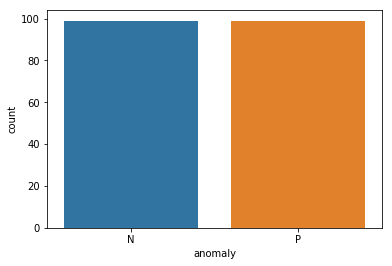

In [95]:
sns.countplot(y_os['anomaly'],label="Count")
plt.show()

#### Label Encoding

In [98]:
le = preprocessing.LabelEncoder()
le.fit(y_os)
y_os=le.transform(y_os)
y_os = pd.DataFrame(y_os)
y_os.shape

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(198, 1)

In [99]:
y_os.head()

,0
0,0
1,0
2,0
3,0
4,0


#### Test train split for training data set

In [100]:
x_test, x_val = train_test_split(x_os, test_size=0.25, random_state=0, shuffle=False)

In [101]:
x_test.shape

(148, 1)

In [102]:
x_val.shape

(50, 1)

In [103]:
y_test, y_val = train_test_split(y_os, test_size=0.25, random_state=0, shuffle=False)

In [104]:
y_test.shape

(148, 1)

In [105]:
y_val.shape

(50, 1)

#### Basic Model Random Forest

In [106]:
forestModel = RandomForestClassifier()

#### Grid Serach Parmeter tuning

In [107]:
parameters = [{'max_depth' : [1,2,3,4,5,6], 'n_estimators' : [1,2,3,4,5,10,20,30,40,50,60,70,80,100],
               'min_samples_leaf' : [0.01,0.02,0.03]}]
grid = GridSearchCV(forestModel,parameters,cv=3)

In [108]:
grid.fit(x_os,y_os)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6], 'n_estimators': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 100], 'min_samples_leaf': [0.01, 0.02, 0.03]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.01, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Crosss Validation

In [110]:
forestModel = RandomForestClassifier(max_depth=1,n_estimators=2,min_samples_leaf=0.01,min_samples_split=2)

In [111]:
cross_validation_scores = cross_val_score(forestModel, x ,y )

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [112]:
cross_validation_scores

array([0.89189189, 0.91666667, 0.91666667])

In [113]:
print("Mean of cross validation scores: ")
np.mean(cross_validation_scores)

Mean of cross validation scores: 


0.9084084084084084